## <center> <font color='purple'> Comparison Diagram - Single and Static Ensemble ML Models</font></center> 
#### <center>Firuz Juraev (Sungkyunkwan Unniversity)</center>

#### <center><font color='red'> Keywords: Single, Static Ensemble, Mortality Prediction, Classification, Comparison, Barchart, Critical Diagram </font></center>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np 
sns.set()

#### <font color='blue'>Libraries for Critical Diagram 

In [2]:
from sklearn.model_selection import StratifiedKFold
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
from Orange.evaluation import compute_CD, graph_ranks
from sklearn.metrics import mean_absolute_error

### <font color='purple'>Load Results 

In [9]:
single_results = pd.read_csv("single_models_results/single_models_results_optimized.csv")
static_results = pd.read_csv("static_models_results/static_ensemble_models_results_optimized.csv")

In [42]:
single_results

,classifiers,accuracy,accuracy_std,precision,precision_std,recall,recall_std,f1,f1_std,auc,auc_std
0,GaussianNB,0.904,0.001,0.955,0.002,0.849,0.003,0.899,0.002,0.974,0.001
1,LogisticRegression,0.952,0.002,0.912,0.004,1.000,0.000,0.954,0.002,0.983,0.001
2,KNeighborsClassifier,0.892,0.002,0.985,0.002,0.797,0.004,0.881,0.003,0.892,0.002
3,DecisionTreeClassifier,0.931,0.002,0.927,0.003,0.934,0.003,0.931,0.002,0.931,0.002
4,SVC,0.956,0.003,0.919,0.004,1.000,0.000,0.958,0.002,0.981,0.001
5,MLPClassifier,0.950,0.008,0.909,0.013,1.000,0.000,0.953,0.007,0.985,0.001


In [43]:
static_results

,classifiers,accuracy,accuracy_std,precision,precision_std,recall,recall_std,f1,f1_std,auc,auc_std
0,AdaBoostClassifier,0.947,0.003,0.904,0.005,1.000,0.000,0.950,0.003,0.988,0.001
1,XGBClassifier,0.919,0.012,0.916,0.011,0.922,0.027,0.919,0.013,0.965,0.007
2,RandomForestClassifier,0.950,0.011,0.919,0.006,0.987,0.026,0.951,0.012,0.983,0.002
3,GradientBoostingClassifier,0.910,0.018,0.931,0.009,0.885,0.039,0.907,0.020,0.970,0.004
4,CatBoostClassifier,0.933,0.002,0.931,0.004,0.935,0.003,0.933,0.002,0.979,0.001
5,LGBMClassifier,0.940,0.002,0.965,0.003,0.914,0.003,0.939,0.002,0.969,0.001
6,VotingClassifier,0.937,0.012,0.927,0.003,0.947,0.027,0.937,0.013,0.939,0.015


#### <font color='green'>Save result 

In [44]:
single_results_file = single_results[:]
static_results_file = static_results[:]

In [45]:
def change_format(x, name): 
    name_std = name + "_std"
    return str(x[name]) + " ± " + str(x[name_std])

In [46]:
single_results_file["accuracy"] = single_results_file.apply(lambda x: change_format(x, 'accuracy'), axis=1) 
single_results_file["precision"] = single_results_file.apply(lambda x: change_format(x, 'precision'), axis=1) 
single_results_file["recall"] = single_results_file.apply(lambda x: change_format(x, 'recall'), axis=1) 
single_results_file["f1"] = single_results_file.apply(lambda x: change_format(x, 'f1'), axis=1) 
single_results_file["auc"] = single_results_file.apply(lambda x: change_format(x, 'auc'), axis=1) 

In [47]:
static_results_file["accuracy"] = static_results_file.apply(lambda x: change_format(x, 'accuracy'), axis=1) 
static_results_file["precision"] = static_results_file.apply(lambda x: change_format(x, 'precision'), axis=1) 
static_results_file["recall"] = static_results_file.apply(lambda x: change_format(x, 'recall'), axis=1) 
static_results_file["f1"] = static_results_file.apply(lambda x: change_format(x, 'f1'), axis=1) 
static_results_file["auc"] = static_results_file.apply(lambda x: change_format(x, 'auc'), axis=1) 

In [48]:
single_results_file.drop(['accuracy_std', 'precision_std', 'recall_std', 'f1_std', 'auc_std'], axis=1, inplace=True)
static_results_file.drop(['accuracy_std', 'precision_std', 'recall_std', 'f1_std', 'auc_std'], axis=1, inplace=True)

In [49]:
single_results_file

,classifiers,accuracy,precision,recall,f1,auc
0,GaussianNB,0.904 ± 0.001,0.955 ± 0.002,0.849 ± 0.003,0.899 ± 0.002,0.974 ± 0.001
1,LogisticRegression,0.952 ± 0.002,0.912 ± 0.004,1.0 ± 0.0,0.954 ± 0.002,0.983 ± 0.001
2,KNeighborsClassifier,0.892 ± 0.002,0.985 ± 0.002,0.797 ± 0.004,0.881 ± 0.003,0.892 ± 0.002
3,DecisionTreeClassifier,0.931 ± 0.002,0.927 ± 0.003,0.934 ± 0.003,0.931 ± 0.002,0.931 ± 0.002
4,SVC,0.956 ± 0.003,0.919 ± 0.004,1.0 ± 0.0,0.958 ± 0.002,0.981 ± 0.001
5,MLPClassifier,0.95 ± 0.008,0.909 ± 0.013,1.0 ± 0.0,0.953 ± 0.007,0.985 ± 0.001


In [50]:
single_results_file.to_csv("single_results_optimized.csv", index=False)

In [51]:
static_results_file.to_csv("static_results_optimized.csv", index=False)

___________________________

In [52]:
single_results.drop(['accuracy_std', 'precision_std', 'recall_std', 'f1_std', 'auc_std'], axis=1, inplace=True)
static_results.drop(['accuracy_std', 'precision_std', 'recall_std', 'f1_std', 'auc_std'], axis=1, inplace=True)

In [53]:
single_results.loc[0, 'classifiers'] = "NaiveBayes"
static_results.loc[6, 'classifiers'] = "MajorityVoting"

In [54]:
single_results

,classifiers,accuracy,precision,recall,f1,auc
0,NaiveBayes,0.904,0.955,0.849,0.899,0.974
1,LogisticRegression,0.952,0.912,1.000,0.954,0.983
2,KNeighborsClassifier,0.892,0.985,0.797,0.881,0.892
3,DecisionTreeClassifier,0.931,0.927,0.934,0.931,0.931
4,SVC,0.956,0.919,1.000,0.958,0.981
5,MLPClassifier,0.950,0.909,1.000,0.953,0.985


In [55]:
static_results

,classifiers,accuracy,precision,recall,f1,auc
0,AdaBoostClassifier,0.947,0.904,1.000,0.950,0.988
1,XGBClassifier,0.919,0.916,0.922,0.919,0.965
2,RandomForestClassifier,0.950,0.919,0.987,0.951,0.983
3,GradientBoostingClassifier,0.910,0.931,0.885,0.907,0.970
4,CatBoostClassifier,0.933,0.931,0.935,0.933,0.979
5,LGBMClassifier,0.940,0.965,0.914,0.939,0.969
6,MajorityVoting,0.937,0.927,0.947,0.937,0.939


In [56]:
single_results.set_index('classifiers',inplace=True)
static_results.set_index('classifiers',inplace=True)

In [57]:
single_results.rename(columns={"accuracy": "Accuracy", "precision": "Precision", 
                          "recall":"Recall", "f1": "F1", "auc": "AUC"}, inplace=True)

static_results.rename(columns={"accuracy": "Accuracy", "precision": "Precision", 
                          "recall":"Recall", "f1": "F1", "auc": "AUC"}, inplace=True)

In [58]:
sns.set(rc={'figure.figsize':(9,5)})
sns.set_style("whitegrid")

(0.5, 1.0)

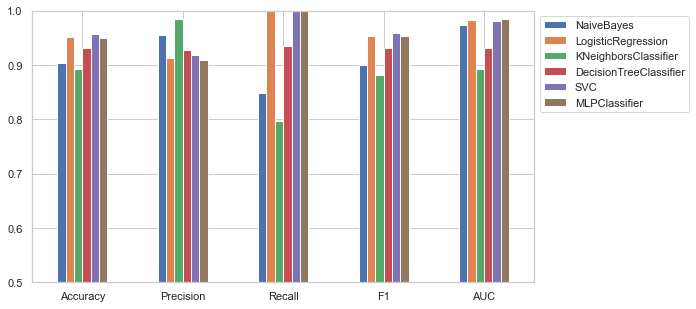

In [60]:
ax = single_results.T.plot.bar(rot=0, legend=True)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0.5, 1)

(0.5, 1.0)

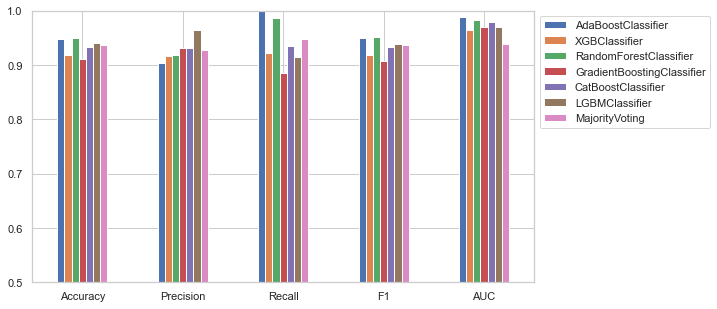

In [61]:
ax = static_results.T.plot.bar(rot=0, legend=True)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0.5, 1)

In [62]:
single_results["Type"] = "Single"
static_results["Type"] = "Static Ensemble"

In [63]:
joinDF = pd.concat([single_results, static_results])

In [64]:
joinDF

,Accuracy,Precision,Recall,F1,AUC,Type
classifiers,,,,,,
NaiveBayes,0.904,0.955,0.849,0.899,0.974,Single
LogisticRegression,0.952,0.912,1.000,0.954,0.983,Single
KNeighborsClassifier,0.892,0.985,0.797,0.881,0.892,Single
DecisionTreeClassifier,0.931,0.927,0.934,0.931,0.931,Single
SVC,0.956,0.919,1.000,0.958,0.981,Single
MLPClassifier,0.950,0.909,1.000,0.953,0.985,Single
AdaBoostClassifier,0.947,0.904,1.000,0.950,0.988,Static Ensemble
XGBClassifier,0.919,0.916,0.922,0.919,0.965,Static Ensemble
RandomForestClassifier,0.950,0.919,0.987,0.951,0.983,Static Ensemble


In [65]:
joinDF['classifiers'] = joinDF.index

In [66]:
sns.set_theme()
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style("whitegrid")

(0.5, 1.0)

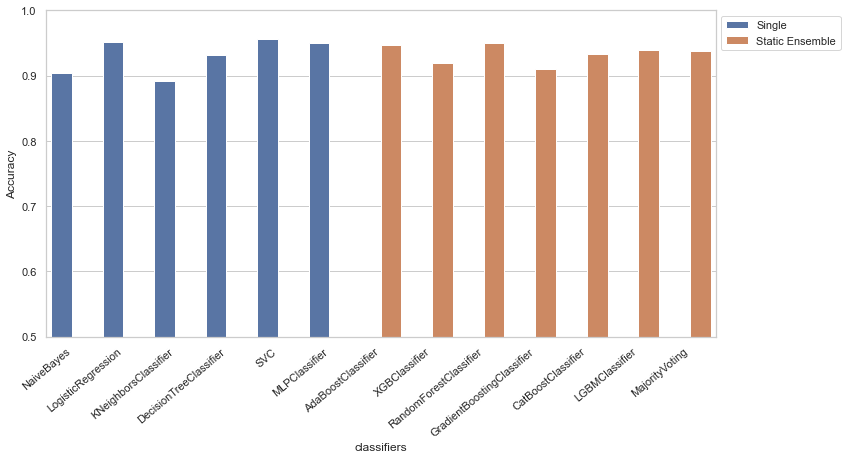

In [67]:
ax = sns.barplot(x="classifiers", y="Accuracy", hue="Type", data=joinDF)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0.5, 1)

## <font color='purple'>Critical Diagram 

In [3]:
full_single_results = pd.read_csv("single_models_results/single_models_results_optimized_extend.csv")
full_static_results = pd.read_csv("static_models_results/static_ensemble_models_results_optimized_extend.csv")

In [4]:
full_single_results

,classifiers,accuracy
0,GaussianNB,"[0.9040767386091128, 0.9046762589928058, 0.901..."
1,LogisticRegression,"[0.9490407673860911, 0.9538369304556354, 0.950..."
2,KNeighborsClassifier,"[0.8914868105515588, 0.8914868105515588, 0.892..."
3,DecisionTreeClassifier,"[0.9268585131894485, 0.9298561151079137, 0.931..."
4,SVC,"[0.9520383693045563, 0.9592326139088729, 0.955..."
5,MLPClassifier,"[0.947242206235012, 0.9376498800959233, 0.9442..."


In [5]:
full_static_results

,classifiers,accuracy
0,AdaBoostClassifier,"[0.9448441247002398, 0.9460431654676259, 0.950..."
1,XGBClassifier,"[0.919664268585132, 0.9316546762589928, 0.9082..."
2,RandomForestClassifier,"[0.9574340527577938, 0.9634292565947242, 0.953..."
3,GradientBoostingClassifier,"[0.934052757793765, 0.9250599520383693, 0.8896..."
4,CatBoostClassifier,"[0.9304556354916067, 0.9370503597122302, 0.931..."
5,LGBMClassifier,"[0.9370503597122302, 0.9412470023980816, 0.938..."
6,VotingClassifier,"[0.9268585131894485, 0.9304556354916067, 0.932..."


In [11]:
full_JoinDF = pd.concat([full_single_results, full_static_results])

In [12]:
full_JoinDF

,classifiers,accuracy
0,GaussianNB,"[0.9040767386091128, 0.9046762589928058, 0.901..."
1,LogisticRegression,"[0.9490407673860911, 0.9538369304556354, 0.950..."
2,KNeighborsClassifier,"[0.8914868105515588, 0.8914868105515588, 0.892..."
3,DecisionTreeClassifier,"[0.9268585131894485, 0.9298561151079137, 0.931..."
4,SVC,"[0.9520383693045563, 0.9592326139088729, 0.955..."
5,MLPClassifier,"[0.947242206235012, 0.9376498800959233, 0.9442..."
0,AdaBoostClassifier,"[0.9448441247002398, 0.9460431654676259, 0.950..."
1,XGBClassifier,"[0.919664268585132, 0.9316546762589928, 0.9082..."
2,RandomForestClassifier,"[0.9574340527577938, 0.9634292565947242, 0.953..."
3,GradientBoostingClassifier,"[0.934052757793765, 0.9250599520383693, 0.8896..."


In [13]:
full_JoinDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 6
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   classifiers  13 non-null     object
 1   accuracy     13 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


In [14]:
def compare_results(results, lst_models):      
        fried_result = friedmanchisquare(*results)
        
        ranks = np.array([rankdata(-p) for p in results])
        
        # Calculating the average ranks.
        average_ranks = np.mean(ranks, axis=0)

        names = [lst_models[i] + ' - ' + str(round(average_ranks[i], 3)) for i in range(len(average_ranks))]
        
        # This method computes the critical difference for Nemenyi test with alpha=0.1.
        # For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
        cd = compute_CD(average_ranks, n=len(results),alpha='0.05', test='nemenyi')
        
        return fried_result, ranks, names, cd , average_ranks

In [15]:
def plot_comparisons(fried_result, names, cd, average_ranks):    
    # This method generates the plot.
    graph_ranks(average_ranks, names=names,
                        cd=cd, width=10, textspace=1.5)
        
    plt.title(f'Friedman-Nemenyi={round(fried_result.pvalue, 4)}\nCD={round(cd, 3)}')
    plt.show()
    
    return

In [16]:
names = ['GaussianNB', 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 
         'SVC', 'MLPClassifier', 'AdaBoostClassifier', 'XGBClassifier', 'RandomForestClassifier', 
         'GradientBoostingClassifier', 'CatBoostClassifier', 'LGBMClassifier', 'VotingClassifier']

dct_results = {}

for n in names:
    res = ast.literal_eval(full_JoinDF[full_JoinDF.classifiers == n].accuracy.to_list()[0])
    dct_results[n] = res

In [22]:
test = dct_results['LogisticRegression']

In [23]:
[(lambda x: round(x,3))(x) for x in test]

[0.949, 0.954, 0.951, 0.95, 0.948, 0.956, 0.954, 0.952, 0.952, 0.95]

In [120]:
results = np.c_[dct_results['GaussianNB'], dct_results['LogisticRegression'], dct_results['KNeighborsClassifier'], 
                dct_results['DecisionTreeClassifier'], dct_results['SVC'], dct_results['MLPClassifier'], 
                dct_results['AdaBoostClassifier'], dct_results['XGBClassifier'], dct_results['RandomForestClassifier'], 
                dct_results['GradientBoostingClassifier'], dct_results['CatBoostClassifier'], dct_results['LGBMClassifier'], 
                dct_results['VotingClassifier']]

fried_result, ranks, names, cd, average_ranks = compare_results(results, names)

In [121]:
names

['GaussianNB - 11.3',
 'LogisticRegression - 3.4',
 'KNeighborsClassifier - 12.9',
 'DecisionTreeClassifier - 8.7',
 'SVC - 1.9',
 'MLPClassifier - 3.5',
 'AdaBoostClassifier - 4.6',
 'XGBClassifier - 10.2',
 'RandomForestClassifier - 3.6',
 'GradientBoostingClassifier - 10.7',
 'CatBoostClassifier - 7.35',
 'LGBMClassifier - 5.8',
 'VotingClassifier - 7.05']

In [126]:
edited_names = ['NaiveBayes - 11.3',
 'LogisticRegression - 3.4',
 'KNeighborsClassifier - 12.9',
 'DecisionTreeClassifier - 8.7',
 'SVC - 1.9',
 'MLPClassifier - 3.5',
 'AdaBoostClassifier - 4.6',
 'XGBClassifier - 10.2',
 'RandomForestClassifier - 3.6',
 'GradientBoostingClassifier - 10.7',
 'CatBoostClassifier - 7.35',
 'LGBMClassifier - 5.8',
 'MajorityVoting - 7.05']


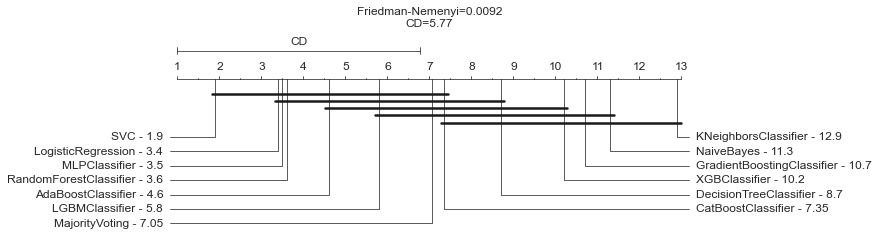

In [128]:
plot_comparisons(fried_result, edited_names, cd, average_ranks)